# Exploratory Data Analysis and Predictive Modeling on 

# IBM Employee Attrition Data

In this notebook, we delve into the IBM Employee Attrition dataset to understand employee turnover and build predictive models. We start with an exploratory data analysis (EDA) to uncover insights and patterns within the data. Visualizations using Seaborn and Matplotlib will help us grasp key trends and relationships.

Main Attributes of the Data:

    Attrition: Indicates whether the employee left the company (Yes/No). This is the target variable for prediction.
    
    Age: The age of the employee in years. Age can be a significant factor in employee retention and career progression.
    
    DistanceFromHome: The distance from the employee’s home to the workplace, in miles. This attribute can influence employee satisfaction and likelihood of attrition.
    
    JobRole: The role of the employee (e.g., Sales Executive, Research Scientist). Different roles may have different attrition rates and job satisfaction levels.
    
    MonthlyIncome: The monthly income of the employee in dollars. Salary can be a major factor influencing employee satisfaction and retention.


    By analyzing these key attributes, we can gain valuable insights into the factors affecting employee attrition and build predictive models to identify employees at risk of leaving

# EXPLORATORY ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\tishya\DATASETS\IBM employee data\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Converting categorial data of 'Attrition' to  True/False
mask = data['Attrition'] == 'Yes'
mask2 = data['Attrition'] == 'No'

data['Attrition'].iloc[mask] = True
data['Attrition'].iloc[mask2] = False
        
data.head()

C:\Users\tishya\AppData\Local\Temp\ipykernel_10284\391332331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attrition'].iloc[mask] = True
C:\Users\tishya\AppData\Local\Temp\ipykernel_10284\391332331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attrition'].iloc[mask2] = False


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,False,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,True,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,False,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,False,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
correlation_matrix = pd.concat((pd.get_dummies(data),data['Attrition'])).corr()

correlation_matrix.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,0
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,NaN,-0.028062,0.028062,NaN
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835,NaN,-0.009135,0.009135,NaN
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,NaN,-0.025514,0.025514,NaN
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,NaN,0.020322,-0.020322,NaN
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


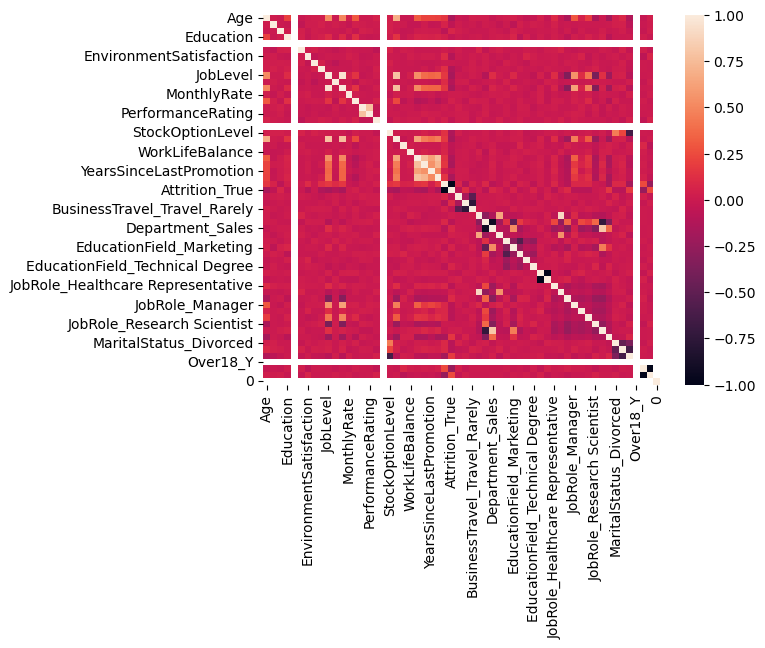

In [9]:
sns.heatmap(correlation_matrix)
plt.show()

In [10]:
# Removing irrelevant columns
data = data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','DailyRate','HourlyRate','MaritalStatus'] , axis=1)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,False,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,True,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,False,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,False,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [11]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Plotting

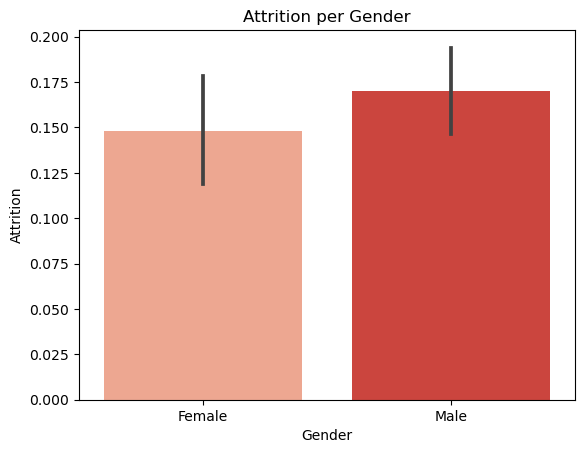

In [12]:
sns.barplot(data,x='Gender' , y='Attrition' , palette='Reds')
plt.title('Attrition per Gender')
plt.show()

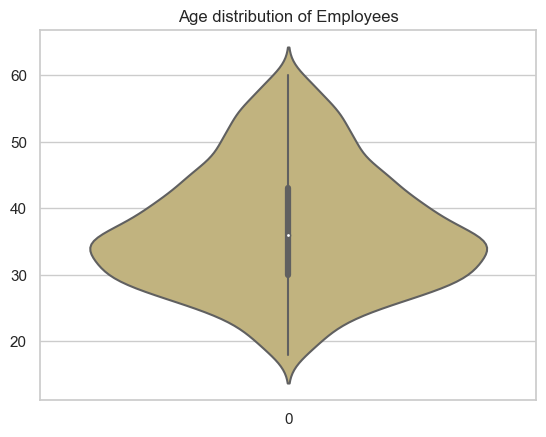

In [13]:
sns.set(style='whitegrid')
sns.violinplot(data['Age'],color='y')
plt.title('Age distribution of Employees')
plt.show()

Majory of employees belong to age gap: 30 to 40

In [14]:
def outliers_age(data):
    Q1 = np.percentile(data['Age'],25)
    Q3 = np.percentile(data['Age'],75)
    
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    mask = (data['Age'] < lower_bound) | (data['Age'] > upper_bound)
    outliers = data['Age'][mask]
    return outliers
outliers_age(data)

Series([], Name: Age, dtype: int64)

There's no outlier in Age

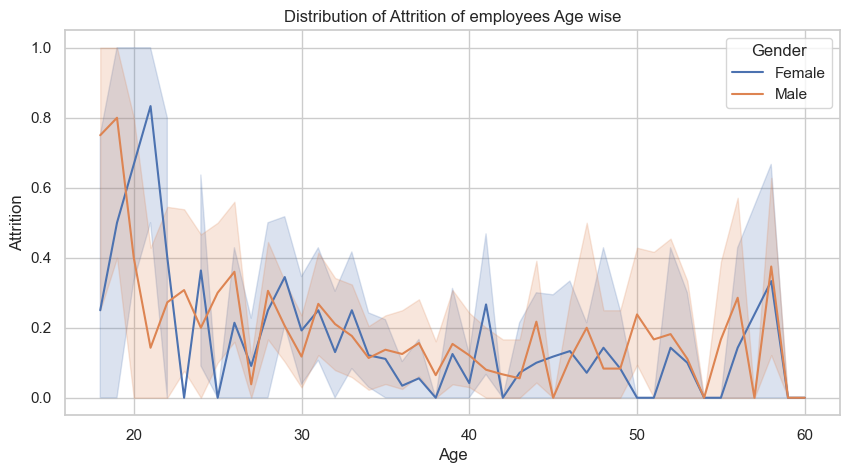

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data,x = 'Age' , y='Attrition' , hue='Gender')
plt.title('Distribution of Attrition of employees Age wise')
plt.show()

Employees of less Age are more likely to leave the company .
Gender isn't influencing much to the factor.

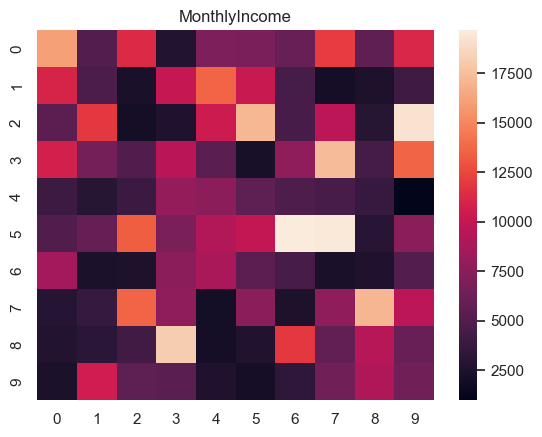

In [16]:
sns.heatmap(data['MonthlyIncome'].sample(100).values.reshape(10,10))
plt.title('MonthlyIncome')
plt.show()

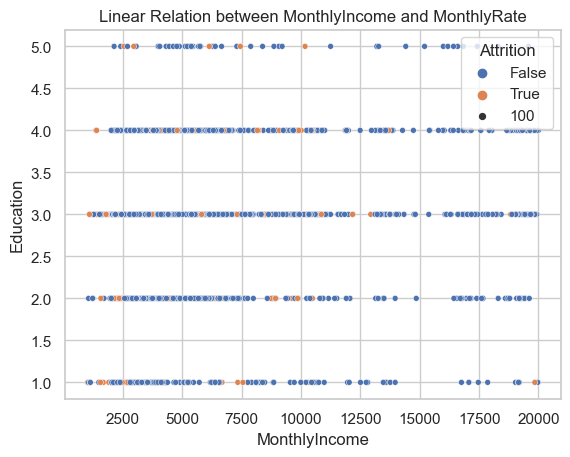

In [17]:
sns.scatterplot(data,x ='MonthlyIncome',y= 'Education',hue='Attrition' ,size=100)
plt.title('Linear Relation between MonthlyIncome and MonthlyRate')
plt.show()

Lack of Clear Trend: 

    There is no obvious linear relationship between MonthlyIncome and Education. Higher education levels do not consistently correspond to higher incomes, as each education level spans a broad range of incomes.

Possible Outliers: 

    The highest incomes (>20,000) are sparsely populated and scattered across different education levels, suggesting potential outliers or exceptional cases.

Cluster Patterns: 
    
    The points are fairly dense along each education level, with more data points around the middle-income range (around 5,000 to 10,000). This clustering indicates that many individuals, regardless of education level, tend to fall within this income range.

In [18]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

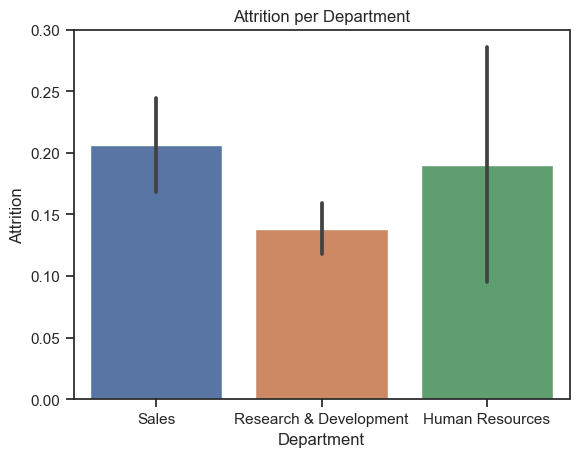

In [19]:
sns.set(style='ticks')
sns.barplot(data,x='Department',y='Attrition')
plt.title('Attrition per Department')

plt.show()

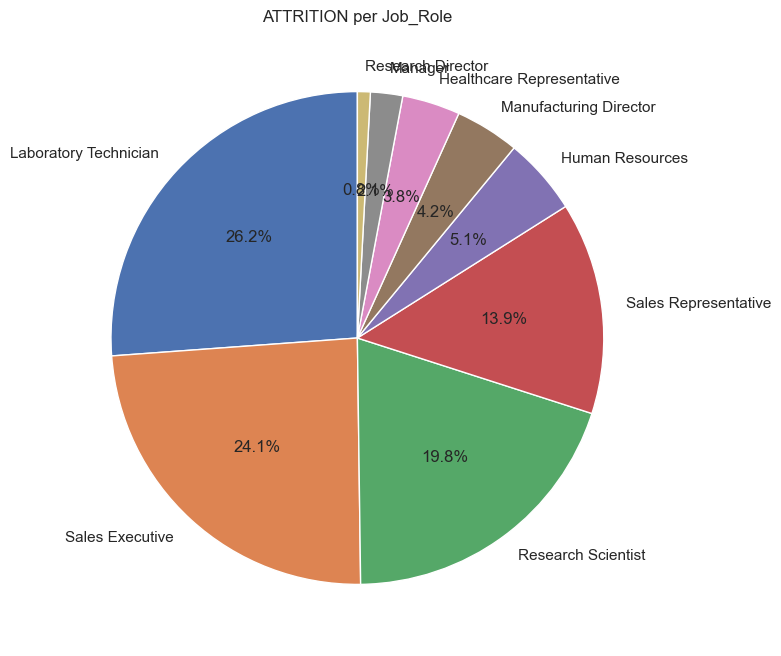

In [20]:
plt.figure(figsize=(8,8))

sizes = data['JobRole'][data['Attrition']==True].value_counts()
labels = sizes.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('ATTRITION per Job_Role')
plt.show()

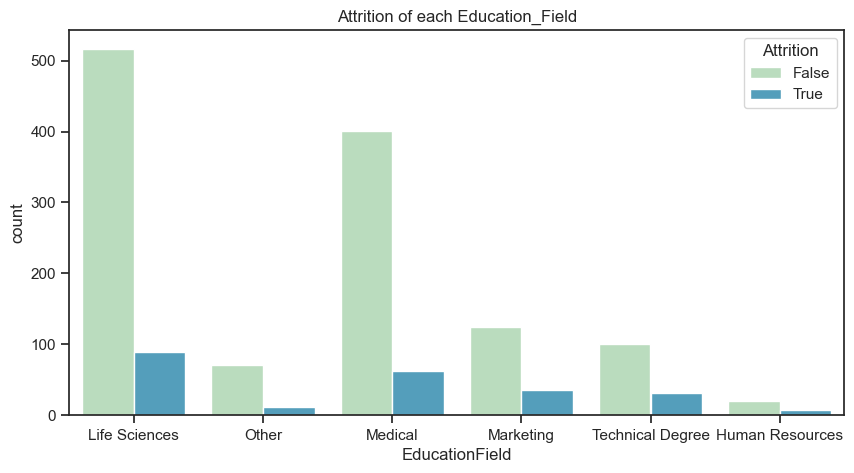

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data , x='EducationField',hue='Attrition',palette='GnBu')
plt.title('Attrition of each Education_Field')
plt.show()

Employees of 'Life Sciences' are more liikely to leave the company followed by  'Medical' and 'Marketing people'

count of employee from 'Human Resources' field is the least 

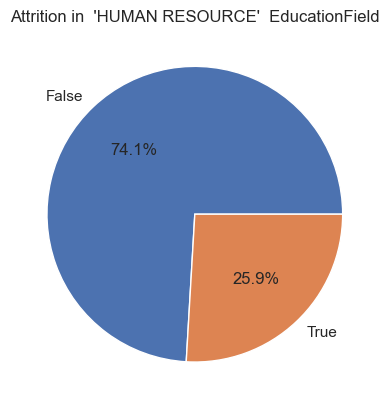

In [22]:
# Plotting bAttrition in \'HUMAN RESOURCE\' EducationField

mask = data['EducationField'] == 'Human Resources'
sizes = data[mask]['Attrition'].value_counts()
label = sizes.index

plt.pie(sizes,labels=label,autopct='%1.1f%%')
plt.title('Attrition in  \'HUMAN RESOURCE\'  EducationField')
plt.show()

more than one fourth portion of eomployees is likely to leave if he/she belong to human_resource EducationField

# MODEL

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeRegressor

In [24]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1,2,2,3,2,4,5993,19479,8,...,False,False,False,False,False,False,False,True,False,True
1,49,8,1,3,2,2,2,5130,24907,1,...,True,False,False,False,False,False,True,False,False,False
2,37,2,2,4,2,1,3,2090,2396,6,...,True,False,True,False,False,False,False,False,False,True
3,33,3,4,4,3,1,3,2909,23159,1,...,False,False,False,False,False,False,True,False,False,True
4,27,2,1,1,3,1,2,3468,16632,9,...,True,False,True,False,False,False,False,False,False,False


In [25]:
# Defining dependent and independent vars
x = data.drop('Attrition_True',axis=1)
y = data['Attrition_True']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

# LOGISTIC REGESSION MODEL

In [27]:
# Creating Model
test_attrition = LogisticRegression()

In [28]:
# fitting data into model
test_attrition.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
test_attrition.score(x_train,y_train)

0.8469387755102041

In [30]:
predicted_y = test_attrition.predict(x_test)

In [31]:
test_attrition.score(x_test,y_test)

0.8095238095238095

In [32]:
accuracy_score(y_test,predicted_y)

0.8095238095238095

# DecisionTree Regression MODEL

In [33]:
tree_model = DecisionTreeRegressor()

In [34]:
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
predicted_y = tree_model.predict(x_test)

In [36]:
accuracy_score(predicted_y,y_test)

0.7891156462585034

In [37]:
rep = classification_report(y_test,predicted_y)
print(rep)

              precision    recall  f1-score   support

       False       0.87      0.87      0.87       238
        True       0.45      0.45      0.45        56

    accuracy                           0.79       294
   macro avg       0.66      0.66      0.66       294
weighted avg       0.79      0.79      0.79       294

